<a href="https://colab.research.google.com/github/amolpatil1976/Synch-Internship/blob/main/Synch_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

from tensorflow import keras #cleaner and shorter weight
from tensorflow.keras import layers #e.g. hidden/ output...
from tensorflow.keras.datasets import boston_housing #data
import time

In [19]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [20]:
print('Training data : {}'.format(train_data.shape))
print('Training target : {}'.format(train_targets.shape))
print('Test data : {}'.format(test_data.shape))
print('Test target : {}'.format(test_targets.shape))

Training data : (404, 13)
Training target : (404,)
Test data : (102, 13)
Test target : (102,)


In [21]:
model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])

optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [22]:
model_1 = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])

optimizer = tf.keras.optimizers.SGD(0.0000004)

model_1.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mse'])

In [23]:
def build_model():
    model = keras.Sequential([layers.Dense(1, input_shape=[train_data.shape[1]])])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mse'])
    return model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [25]:
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            # calculate training time
            t = time.monotonic() - self.time
            # if validation set is included, its loss is recorded in logs['val_loss']
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))
EPOCHS = 3001


history = model.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])


| Epoch    0 | training time   0.70s | train loss 6788.77 |
| Epoch  100 | training time   2.08s | train loss  78.76 |
| Epoch  200 | training time   3.46s | train loss  52.41 |
| Epoch  300 | training time   4.85s | train loss  43.04 |
| Epoch  400 | training time   6.24s | train loss  39.66 |
| Epoch  500 | training time   7.59s | train loss  36.82 |
| Epoch  600 | training time   8.96s | train loss  35.14 |
| Epoch  700 | training time  10.67s | train loss  33.16 |
| Epoch  800 | training time  12.05s | train loss  30.99 |
| Epoch  900 | training time  13.40s | train loss  29.86 |
| Epoch 1000 | training time  14.75s | train loss  30.11 |
| Epoch 1100 | training time  16.11s | train loss  28.41 |
| Epoch 1200 | training time  17.46s | train loss  27.38 |
| Epoch 1300 | training time  18.77s | train loss  26.72 |
| Epoch 1400 | training time  20.11s | train loss  26.23 |
| Epoch 1500 | training time  21.62s | train loss  26.03 |
| Epoch 1600 | training time  23.19s | train loss  25.6

In [32]:
class PrintLoss(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        if epoch == 0: self.time = time.monotonic()
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            t = time.monotonic() - self.time
            print('| Epoch {:4} | training time {:6.2f}s | train loss {:6.2f} |'
                  .format(epoch, t, logs['loss']))
EPOCHS = 3001 #k

history_1 = model_1.fit(train_data, train_targets,
                    epochs=EPOCHS, verbose=0,
                    callbacks=[PrintLoss()])

#SGD is very sensitive (when chooseing different stepsize)

| Epoch    0 | training time   0.32s | train loss 7978.93 |
| Epoch  100 | training time   1.79s | train loss  75.82 |
| Epoch  200 | training time   3.06s | train loss  71.27 |
| Epoch  300 | training time   4.35s | train loss  69.73 |
| Epoch  400 | training time   5.62s | train loss  68.30 |
| Epoch  500 | training time   6.90s | train loss  66.84 |
| Epoch  600 | training time   8.17s | train loss  66.00 |
| Epoch  700 | training time   9.46s | train loss  64.89 |
| Epoch  800 | training time  10.74s | train loss  64.43 |
| Epoch  900 | training time  12.33s | train loss  63.32 |
| Epoch 1000 | training time  13.73s | train loss  62.50 |
| Epoch 1100 | training time  15.02s | train loss  62.28 |
| Epoch 1200 | training time  16.30s | train loss  61.72 |
| Epoch 1300 | training time  17.60s | train loss  60.64 |
| Epoch 1400 | training time  18.87s | train loss  60.36 |
| Epoch 1500 | training time  20.17s | train loss  59.95 |
| Epoch 1600 | training time  21.44s | train loss  59.1

In [33]:
#turn into dataframe
hist = pd.DataFrame(history.history)
#new add column
hist['epoch'] = history.epoch
display(hist.tail())

#SDK
hist_1 = pd.DataFrame(history_1.history)
#new add column
hist_1['epoch'] = history_1.epoch
display(hist_1.tail())

,loss,mse,epoch
2996,25.551495,25.551495,2996
2997,25.388657,25.388657,2997
2998,24.669415,24.669415,2998
2999,24.898277,24.898277,2999
3000,24.753931,24.753931,3000


,loss,mse,epoch
2996,54.863487,54.863487,2996
2997,54.738174,54.738174,2997
2998,54.705963,54.705963,2998
2999,54.347099,54.347099,2999
3000,54.958923,54.958923,3000


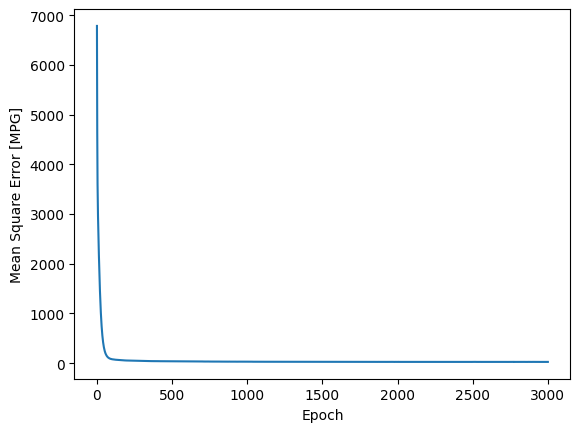

In [28]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [MPG]')
    plt.plot(hist['epoch'], hist['mse'],
             label='Train Error')

    plt.show()
#Adam
plot_history(history)

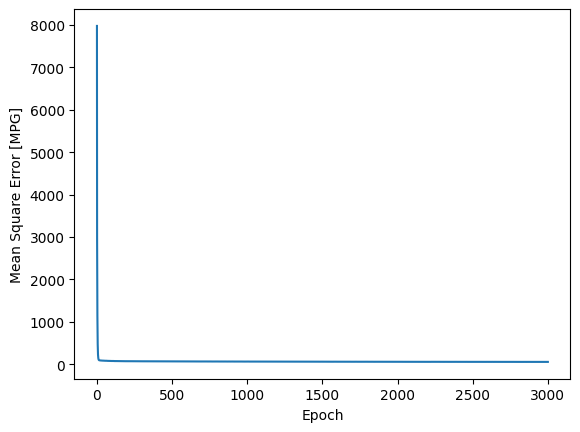

In [34]:
plot_history(history_1)

In [35]:
_, mse = model.evaluate(test_data, test_targets, verbose=0)

print("Adam: Testing set Mean Squared Error: {:5.2f}".format(mse))



_, mse_1 = model_1.evaluate(test_data, test_targets, verbose=0)

print("SDK: Testing set Mean Squared Error: {:5.2f}".format(mse_1))

Adam: Testing set Mean Squared Error: 23.85
SDK: Testing set Mean Squared Error: 62.48


4/4 [==============================] - 0s 3ms/step


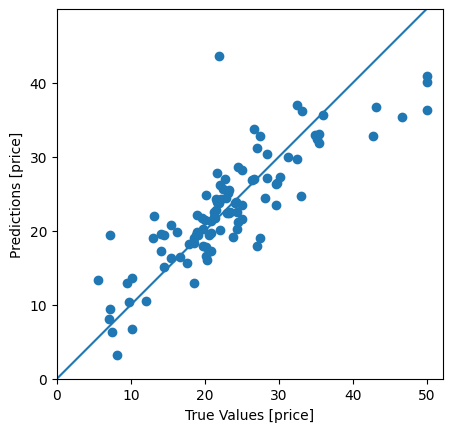

In [31]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100]) #diagonal line

4/4 [==============================] - 0s 2ms/step


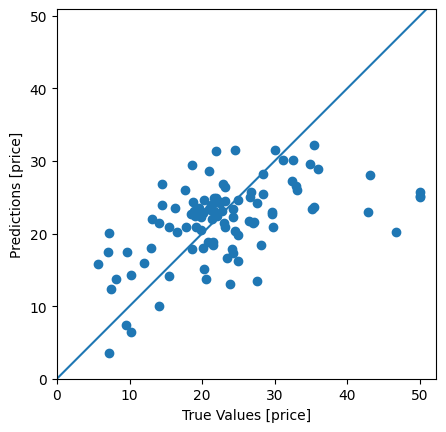

In [36]:
test_predictions_1 = model_1.predict(test_data).flatten()

plt.scatter(test_targets, test_predictions_1)
plt.xlabel('True Values [price]')
plt.ylabel('Predictions [price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100]) #diagonal line